<a href="https://colab.research.google.com/github/vinthegreat84/ML-Lab/blob/main/07_Apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [10]:
# Read in data
link = 'https://raw.githubusercontent.com/vinthegreat84/ML-Lab/main/data/drilling.csv'
df = pd.read_csv(link)
df.head()

,Depth_(m),Bit Size_(inch),Bit_Type,Weight_on_Bit,Bit_Rotation_(RPM),Mud_Weight(pcf),Flow_Rate(gpm),Pump_Pressure_(psia),Rate_of_Penetration_ROP_(M/H)
0,18.0,26.0,1,3.5,35.0,65.0,100,0,0.20
1,20.0,26.0,1,3.5,35.0,65.0,100,200,2.50
2,1093.0,17.5,3,0.0,0.0,76.0,0,0,1.63
3,1163.0,17.5,1,0.0,0.0,80.0,0,0,1.77
4,3083.0,8.5,3,0.0,0.0,80.0,0,0,1.17


In [11]:
# Convert the dataframe to a list of lists, where each list represents a transaction
transaction_list = df.values.tolist()

# Use the TransactionEncoder to convert the transactions into a binary format
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Use the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)

   support      itemsets
0     0.60         (0.0)
1     0.30         (2.0)
2     0.55         (3.0)
3     0.30         (8.5)
4     0.40       (12.25)
5     0.40  (0.0, 12.25)
6     0.30    (8.5, 3.0)


In [12]:
from mlxtend.frequent_patterns import association_rules

# Generate the association rules
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(association_rules)

  antecedents consequents  antecedent support  consequent support  support  \
0       (0.0)     (12.25)                0.60                0.40      0.4   
1     (12.25)       (0.0)                0.40                0.60      0.4   
2       (8.5)       (3.0)                0.30                0.55      0.3   
3       (3.0)       (8.5)                0.55                0.30      0.3   

   confidence      lift  leverage  conviction  
0    0.666667  1.666667     0.160        1.80  
1    1.000000  1.666667     0.160         inf  
2    1.000000  1.818182     0.135         inf  
3    0.545455  1.818182     0.135        1.54  


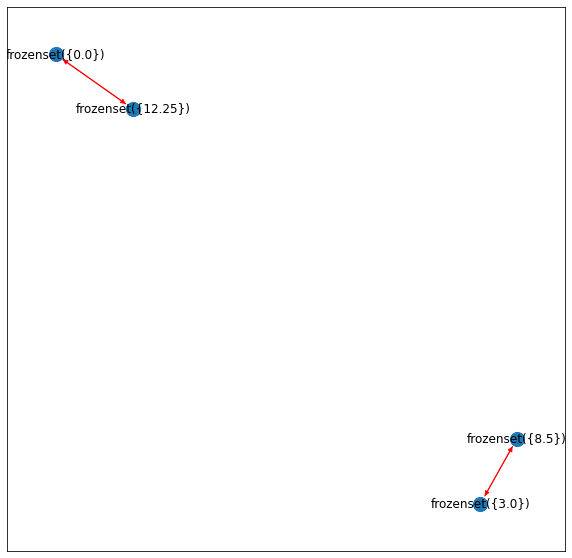

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for i in range(0,len(association_rules)):
    G.add_edge(association_rules.iloc[i]['antecedents'], association_rules.iloc[i]['consequents'], weight = association_rules.iloc[i]['confidence'])

fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
plt.show()